In [ ]:
# 運用獲得的資料 -> AI -> 資料分析, 或是建立模型去協助人類預測或是回答問題
# AI: 機器學習 (ML, Machine Learning); 類神經網路 (NN, Neuro Network)
# ML: 單純線性迴歸 (Smiple Liner Regression) y = ax + b
# 多元線性迴歸: y = a1x1 + a2x2 + a3x3 +..... + b
# 波士頓房價
# CRIM 城鎮犯罪率; ZN 住宅用地超過 700 坪; INDUS 非商業用地比例; NOX; CHAS 河; RM 房間數; AGE: 房齡; DIS 就業中心距離, RAD, TAX, PTRATIO B
# LSTAT -> 房價

In [3]:
from sklearn import datasets
#data = datasets.load_boston().data

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [20]:
#5分鐘時間完成到這個部分: 7:02
#資料切割: 80% 模型的訓練; 20% 驗證模型的準確性
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2)
print(data_train.shape)
print(data_test.shape)
print(target_train.shape)
#3分鐘練習, 7:14

(404, 13)
(102, 13)
(404,)


In [21]:
#建立一個多元線性迴歸的預測模型
from sklearn.linear_model import LinearRegression
regr_model = LinearRegression()
regr_model.fit(data_train, target_train)
#3分鐘完成, 訓練模型 7:23

LinearRegression()

In [22]:
pre = regr_model.predict(data_test)
print(pre.round(1))
print(target_test)

#模型的評估方法
#3分鐘練習, 第一節課10分鐘休息 7: 40 繼續

[26.9 20.6  6.8 32.5 16.2 23.7 19.7 22.1 20.4 20.8 19.7 16.  25.3 35.4
 33.3  6.9 19.1 24.1 25.1 23.5 30.7 17.1 22.5 22.6 21.  18.7 24.1 22.8
 18.7  3.5 26.7 16.1 18.3 29.  31.3 14.9 43.7  5.3 20.5 24.2 17.  28.3
 14.  17.2 33.1 20.5 23.  20.1 20.4 22.5 20.7 28.3 43.2 13.8 27.6 15.6
 33.7 18.3 18.5 21.8 26.9 30.1 24.9 28.3  8.2 31.5 21.3 31.5 20.6 15.7
 16.8 19.1 28.8 19.8 22.2 21.  16.9 16.2 21.6 23.  30.4 18.8 18.6 39.6
  7.  23.  21.1 22.5 30.8 21.  10.3 10.2 12.6 17.8 25.  26.1 19.8 28.5
 12.5 30.9 12.9 24.7]
[22.8 18.9 14.6 29.  14.1 22.2 27.9 26.4 18.8 19.6 16.7 17.3 29.6 39.8
 37.2 10.4 18.5 24.4 23.8 19.1 25.1 19.1 11.9 22.7 21.8 14.5 22.4 21.2
 19.9  8.1 24.8 10.4 12.1 22.9 35.4 11.7 50.  10.5 22.9 21.4 20.  23.9
 13.6 14.9 41.3 19.3 24.7 17.8 23.  20.3 20.9 23.7 50.  13.4 36.2 15.6
 36.1 20.  18.4 17.4 22.1 30.5 23.9 24.3 17.8 29.9 24.5 30.8 21.1 18.4
 19.6 18.5 24.6 21.5 22.9 20.9 19.1 13.3 23.3 17.8 32.7 20.3 27.1 21.9
 11.9 19.8 22.  25.  28.4 20.4 16.5  7.2 27.5 17.2 24. 

In [23]:
#模型評估方法 1：決定係數 (迴歸)
print(regr_model.score(data_train, target_train).round(3))
# 0 <> 1, 至少大於 0.7, 0.999
print(regr_model.score(data_test, target_test).round(3))
# Overfitting
#0.734
#0.751
# 3 分鐘練習, 7:51

0.749
0.67


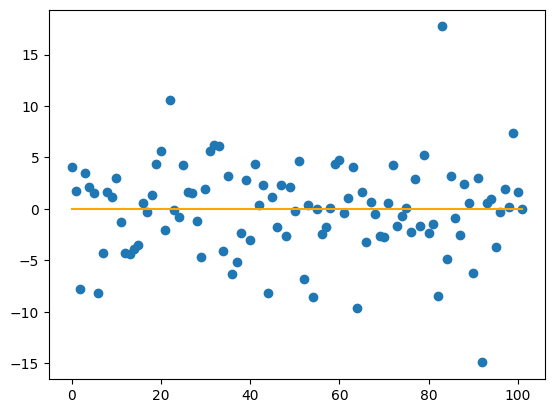

In [24]:
#模型評估方法 2：圖形:殘差圖 (residual plot)
import matplotlib.pyplot as plt
x = np.arange(pre.size)
y = x*0
plt.scatter(x, pre - target_test)
plt.plot(x, y, color='orange') # 劃出 y= 0 的基礎線
plt.show()
#5分鐘練習, 8:04

In [25]:
#模型評估方法 3：平均絕對誤差 (MAE, mean absolute error)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(target_test, pre).round(2))
#3分鐘練習, 8:11

3.26
